In [2]:
# importing basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [4]:
# Splitting into train, test data

X=df.drop(columns=['FWI'],axis=1)
y=df['FWI']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25)

In [5]:
# Feature Selection

df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

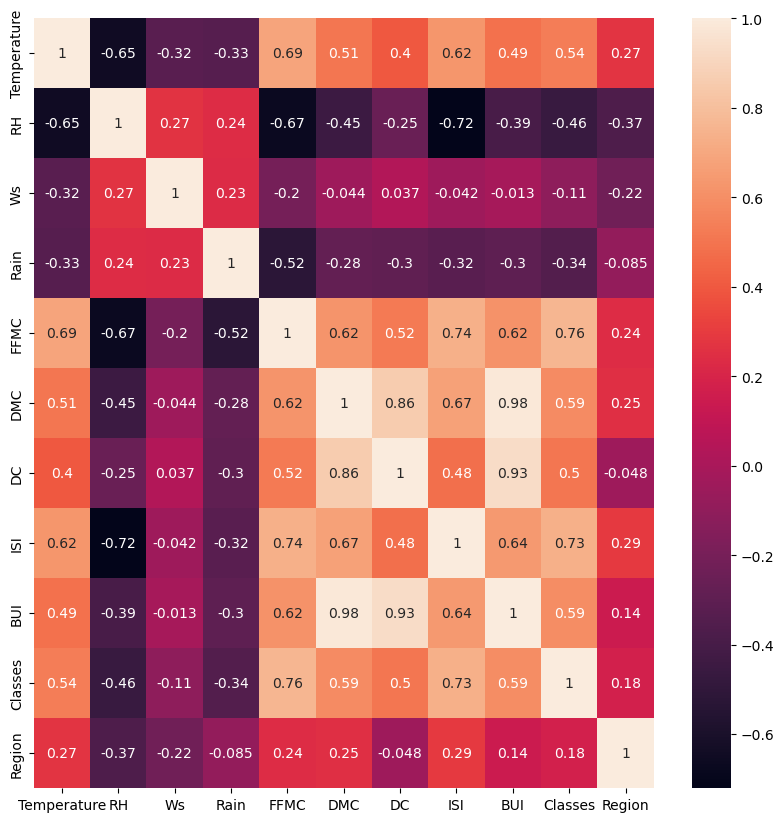

In [6]:
# Checking for multicolinearity
plt.figure(figsize=(10,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [7]:
def feature_selection(dataset, threshold):

    col_corr=set()  # we use set as we only want the unique feature names
    corr_matrix=dataset.corr()

    for i in range(len(corr_matrix.columns)):

        for j in range(i):

            if abs(corr_matrix.iloc[i,j])>threshold:

                colname=corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr

In [8]:
dropped_features=feature_selection(X_train, 0.85)        # in real-world projects, the threshold value is selected by the domain experts within the company

In [9]:
# dropping features when correlation is more than 0.85

X_train.drop(dropped_features, axis=1, inplace=True)
X_test.drop(dropped_features, axis=1, inplace=True)

In [10]:
# Standardization

from sklearn. preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [11]:
X_train_scaled

array([[-0.53992606,  1.02710871, -0.5860955 , ..., -0.48513959,
         0.9258201 , -1.        ],
       [ 1.34463778, -0.48519416, -0.23520938, ...,  0.84983073,
         0.9258201 ,  1.        ],
       [-1.07837287, -0.28793727,  0.81744898, ..., -0.81302704,
        -1.08012345,  1.        ],
       ...,
       [-2.6937133 ,  0.89560412,  3.62453794, ..., -1.00039129,
        -1.08012345, -1.        ],
       [ 1.34463778, -0.41944186, -1.63875386, ...,  0.12379424,
         0.9258201 ,  1.        ],
       [ 1.07541437, -1.27422175,  0.11567674, ...,  1.59928775,
         0.9258201 ,  1.        ]], shape=(182, 9))

<Axes: title={'center': 'X_train after scaling'}>

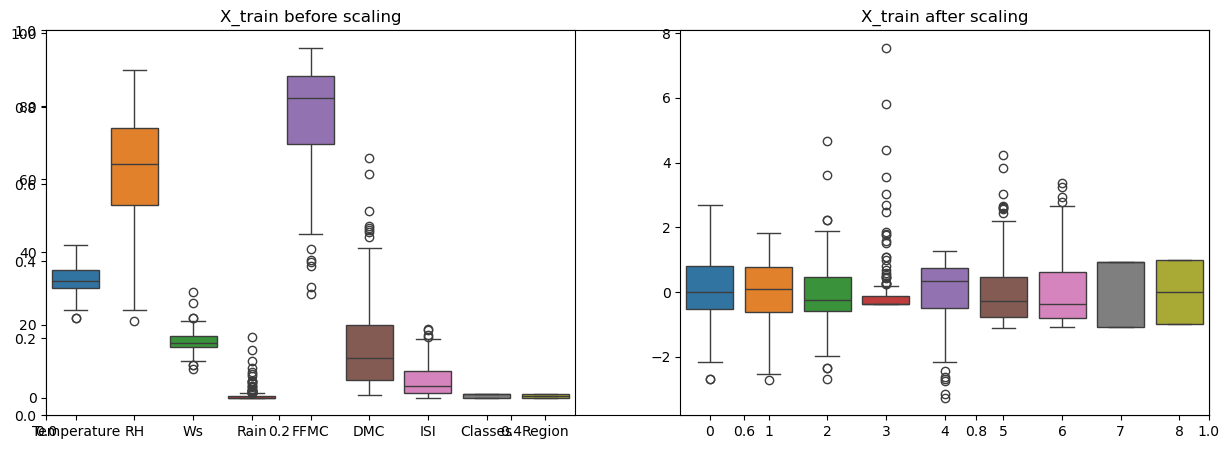

In [12]:
# Box Plots to understand the effect of standard scaler

plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
plt.title("X_train after scaling")
sns.boxplot(data=X_train_scaled)

Mean Absolute Error:0.6972687195564334
R2 Score:0.9802046283928123


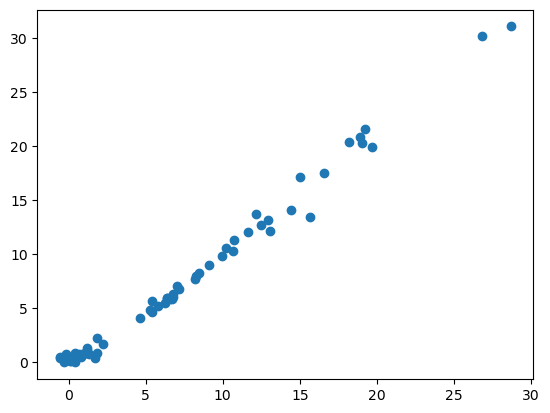

In [13]:
# Linear zregression Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

linreg=LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_pred,y_test)
score=r2_score(y_pred, y_test)
print(f"Mean Absolute Error:{mae}")
print(f"R2 Score:{score}")
print(plt.scatter(y_pred, y_test))

Mean Absolute Error:1.3603336080326507
R2 Score:0.8825636357059452


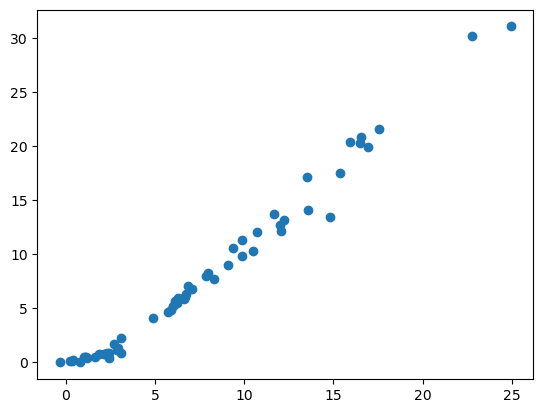

In [14]:
# Lasso Regression

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lasso=Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_pred,y_test)
score=r2_score(y_pred, y_test)
print(f"Mean Absolute Error:{mae}")
print(f"R2 Score:{score}")
print(plt.scatter(y_pred, y_test))

Mean Absolute Error:0.7208966510148521
R2 Score:0.9788314885550841


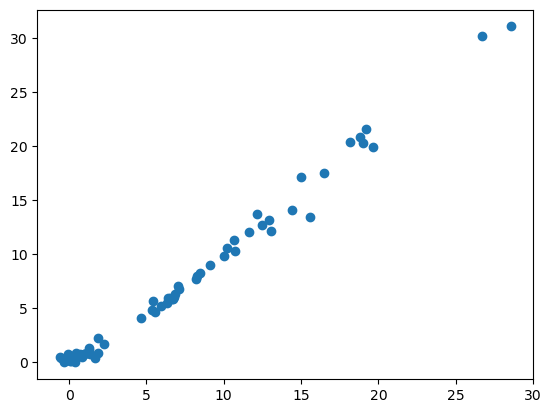

In [15]:
# Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

ridge=Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_pred,y_test)
score=r2_score(y_pred, y_test)
print(f"Mean Absolute Error:{mae}")
print(f"R2 Score:{score}")
print(plt.scatter(y_pred, y_test))

Mean Absolute Error:2.101966961124289
R2 Score:0.6729146266676087


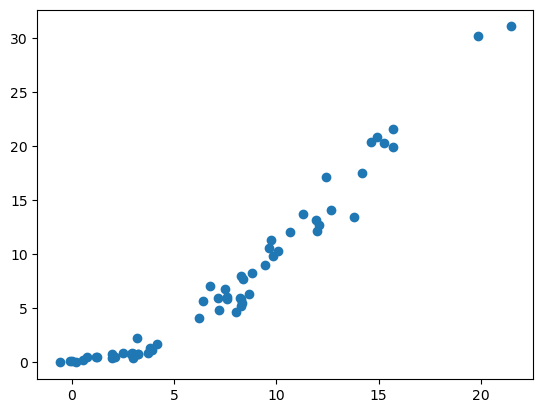

In [16]:
# ElasticNet Regression

from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

elasticnet=ElasticNet()
elasticnet.fit(X_train_scaled, y_train)
y_pred=elasticnet.predict(X_test_scaled)
mae=mean_absolute_error(y_pred,y_test)
score=r2_score(y_pred, y_test)
print(f"Mean Absolute Error:{mae}")
print(f"R2 Score:{score}")
print(plt.scatter(y_pred, y_test))

Mean Absolute Error:0.6930045723784736
R2 Score:0.979374574843781


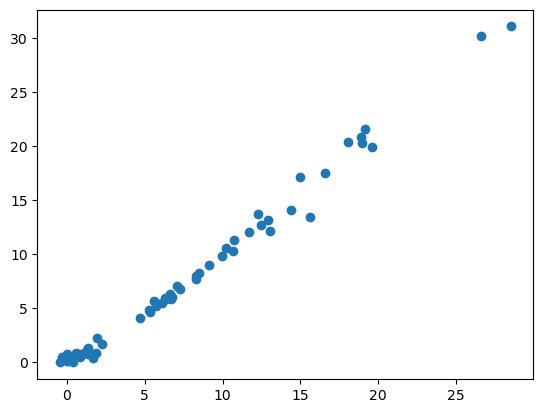

In [17]:
# Cross Validation Lasso

from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)
y_pred=lassocv.predict(X_test_scaled)
mae=mean_absolute_error(y_pred,y_test)
score=r2_score(y_pred, y_test)
print(f"Mean Absolute Error:{mae}")
print(f"R2 Score:{score}")
print(plt.scatter(y_pred, y_test))

Mean Absolute Error:0.7208966510148521
R2 Score:0.9788314885550841


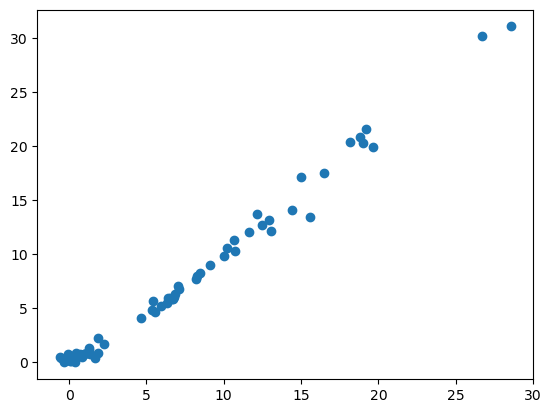

In [18]:
# Cross Validation Ridge

from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)
y_pred=ridgecv.predict(X_test_scaled)
mae=mean_absolute_error(y_pred,y_test)
score=r2_score(y_pred, y_test)
print(f"Mean Absolute Error:{mae}")
print(f"R2 Score:{score}")
print(plt.scatter(y_pred, y_test))

Mean Absolute Error:0.7271629862990642
R2 Score:0.9782441524081209


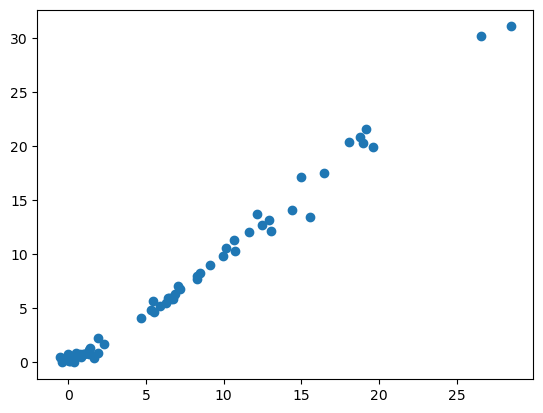

In [19]:
# Cross Validation ElasticNet

from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

elasticnetcv=ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled, y_train)
y_pred=elasticnetcv.predict(X_test_scaled)
mae=mean_absolute_error(y_pred,y_test)
score=r2_score(y_pred, y_test)
print(f"Mean Absolute Error:{mae}")
print(f"R2 Score:{score}")
print(plt.scatter(y_pred, y_test))

In [22]:
# Saving the scaler and Ridge Model

import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('AFF_model.pkl','wb'))